<a href="https://colab.research.google.com/github/LeeJaeEun0/230102_mini_project_st/blob/main/230102_Decision_Tree_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Byeon-MJ/ML_Mini_Project_CreditCard/main/dataset/preprocessed_data.csv')
df

,Unnamed: 0,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_mean,age_gen
0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,2.0,6.0,1.0,101250.0,3
1,1,0,0,1,247500.0,0,4,0,1,11380,1540,0,0,1,3.0,5.0,1.0,82500.0,3
2,2,1,1,1,450000.0,4,1,1,1,19087,4434,0,1,0,2.0,22.0,2.0,225000.0,5
3,3,0,0,1,202500.0,0,4,1,1,15088,2092,0,1,0,2.0,37.0,0.0,101250.0,4
4,4,0,1,1,157500.0,2,1,1,1,15037,2105,0,0,0,2.0,26.0,2.0,78750.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,26393,0,0,0,225000.0,2,4,1,1,12079,1984,0,0,0,4.0,2.0,1.0,56250.0,3
26394,26394,0,0,1,180000.0,4,1,2,1,15291,2475,0,0,0,2.0,47.0,2.0,90000.0,4
26395,26395,0,1,0,292500.0,4,4,0,5,10082,2015,0,0,0,2.0,25.0,2.0,146250.0,2
26396,26396,1,0,1,171000.0,4,2,3,1,10145,107,0,0,0,1.0,59.0,2.0,171000.0,2


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

gender           0
car              0
reality          0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
income_mean      0
age_gen          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26398 entries, 0 to 26397
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26398 non-null  int64  
 1   car            26398 non-null  int64  
 2   reality        26398 non-null  int64  
 3   income_total   26398 non-null  float64
 4   income_type    26398 non-null  int64  
 5   edu_type       26398 non-null  int64  
 6   family_type    26398 non-null  int64  
 7   house_type     26398 non-null  int64  
 8   DAYS_BIRTH     26398 non-null  int64  
 9   DAYS_EMPLOYED  26398 non-null  int64  
 10  work_phone     26398 non-null  int64  
 11  phone          26398 non-null  int64  
 12  email          26398 non-null  int64  
 13  family_size    26398 non-null  float64
 14  begin_month    26398 non-null  float64
 15  credit         26398 non-null  float64
 16  income_mean    26398 non-null  float64
 17  age_gen        26398 non-null  int64  
dtypes: flo

## 모델링 & 평가

 credit으로 실험한 결과

In [ ]:
from sklearn.tree import DecisionTreeClassifier # 분류

In [ ]:
model = DecisionTreeClassifier(random_state=21)

In [ ]:
X = df.drop('credit', axis=1) # 목표변수(관측값, 피쳐)
y = df['credit'] # 종속변수 (종속값, 라벨)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21,
)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
pred = model.predict(X_test)
pred

array([1., 2., 2., ..., 2., 2., 2.])

In [ ]:
model.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, pred) 

0.6081439393939394

In [ ]:
from sklearn.tree import plot_tree

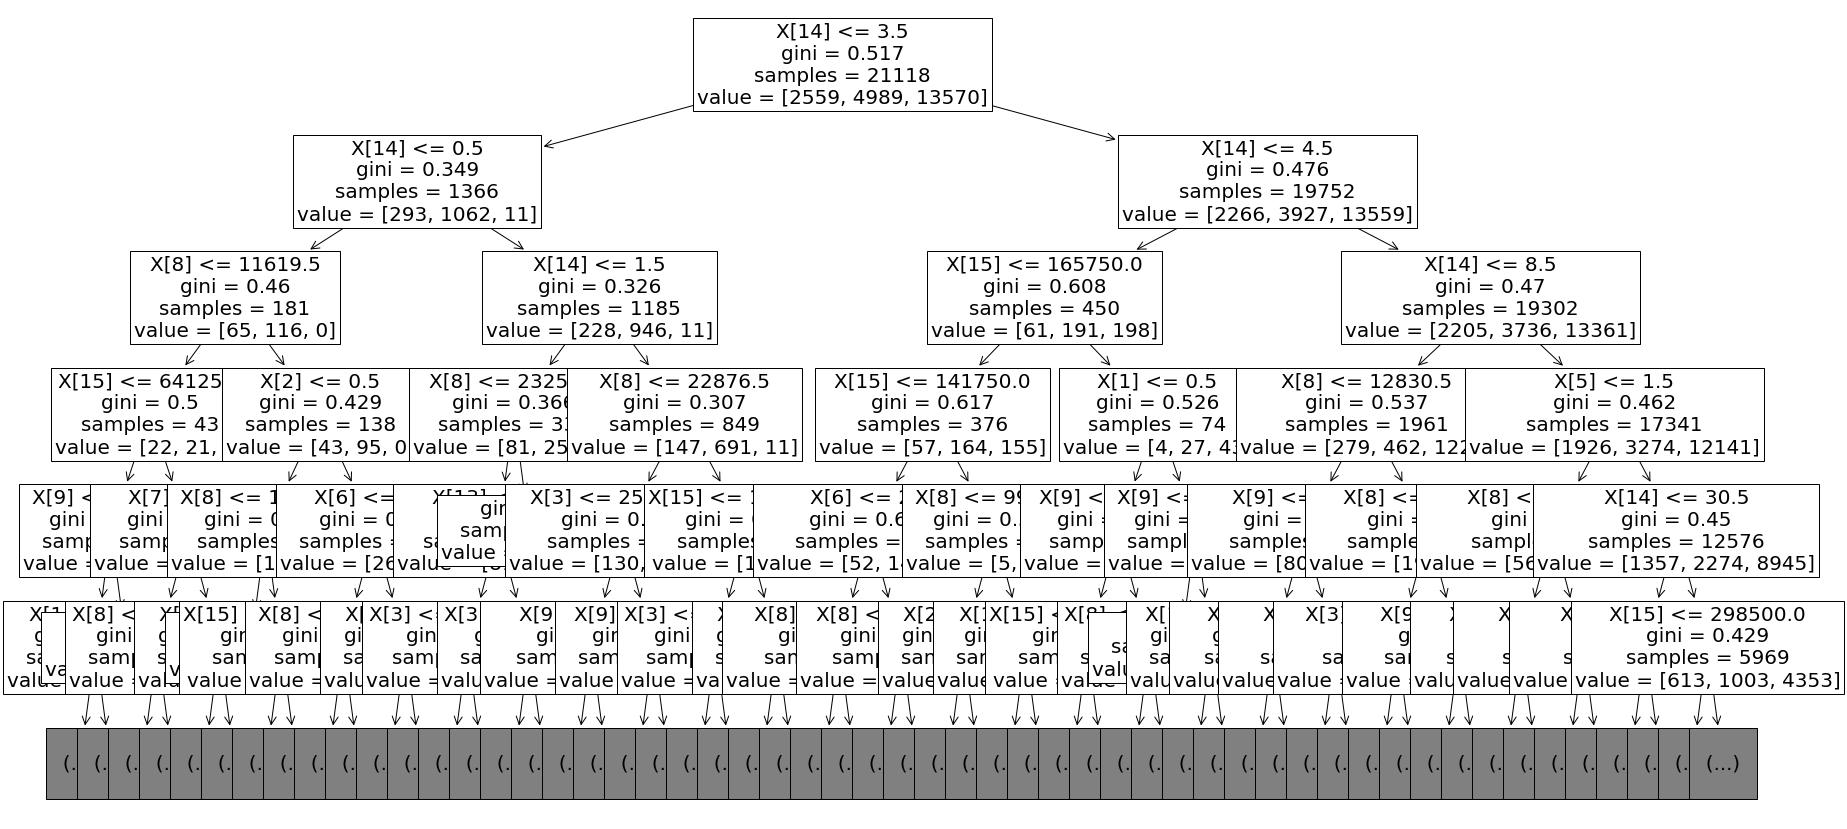

In [ ]:
plt.figure(figsize=(30, 15)) # plt 객체의 크기 결정
# 트리 구조를 보고 싶은 모델을 넣고, 최대 깊이, 폰트 사이즈, 
plot_tree(model, max_depth=5, fontsize=20) # 변수명 지정 X
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26398 entries, 0 to 26397
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26398 non-null  int64  
 1   car            26398 non-null  int64  
 2   reality        26398 non-null  int64  
 3   income_total   26398 non-null  float64
 4   income_type    26398 non-null  int64  
 5   edu_type       26398 non-null  int64  
 6   family_type    26398 non-null  int64  
 7   house_type     26398 non-null  int64  
 8   DAYS_BIRTH     26398 non-null  int64  
 9   DAYS_EMPLOYED  26398 non-null  int64  
 10  work_phone     26398 non-null  int64  
 11  phone          26398 non-null  int64  
 12  email          26398 non-null  int64  
 13  family_size    26398 non-null  float64
 14  begin_month    26398 non-null  float64
 15  credit         26398 non-null  float64
 16  income_mean    26398 non-null  float64
 17  age_gen        26398 non-null  int64  
dtypes: flo

In [ ]:
def test_depth(depth):
  # max_depth : 트리의 깊이 제한
  model = DecisionTreeClassifier(random_state=21, max_depth=depth)
  model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
  # 훈련 데이터로 모델을 통해서 예측
  train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
  # 시험 데이터로 모델을 통해서 예측
  test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
  print(f"depth: {depth}")
  print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 훈련 세트 정확도
  print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 테스트 세트 정확도


In [ ]:
for i in range(1, 20):
    test_depth(i)

depth: 1
Train Score : 0.6923477602045648
Test Score : 0.6865530303030303
depth: 2
Train Score : 0.6923477602045648
Test Score : 0.6865530303030303
depth: 3
Train Score : 0.6928212898948765
Test Score : 0.6863636363636364
depth: 4
Train Score : 0.6934368784922814
Test Score : 0.687310606060606
depth: 5
Train Score : 0.6948574675632162
Test Score : 0.6857954545454545
depth: 6
Train Score : 0.6963254096031821
Test Score : 0.6833333333333333
depth: 7
Train Score : 0.7010133535372668
Test Score : 0.6835227272727272
depth: 8
Train Score : 0.7048015910597595
Test Score : 0.6837121212121212
depth: 9
Train Score : 0.7098210057770622
Test Score : 0.6793560606060606
depth: 10
Train Score : 0.7152665972156454
Test Score : 0.6778409090909091
depth: 11
Train Score : 0.722038071787101
Test Score : 0.6753787878787879
depth: 12
Train Score : 0.7299933705843357
Test Score : 0.6714015151515151
depth: 13
Train Score : 0.7395113173595984
Test Score : 0.6714015151515151
depth: 14
Train Score : 0.7497869116

In [ ]:
for i in range(1, 20):
  model = DecisionTreeClassifier(random_state=21, max_depth=i)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc_score = accuracy_score(pred, y_test)
  print(f'Index : {i}, accuracy_score : {acc_score}')

Index : 1, accuracy_score : 0.6865530303030303
Index : 2, accuracy_score : 0.6865530303030303
Index : 3, accuracy_score : 0.6863636363636364
Index : 4, accuracy_score : 0.687310606060606
Index : 5, accuracy_score : 0.6857954545454545
Index : 6, accuracy_score : 0.6833333333333333
Index : 7, accuracy_score : 0.6835227272727272
Index : 8, accuracy_score : 0.6837121212121212
Index : 9, accuracy_score : 0.6793560606060606
Index : 10, accuracy_score : 0.6778409090909091
Index : 11, accuracy_score : 0.6753787878787879
Index : 12, accuracy_score : 0.6714015151515151
Index : 13, accuracy_score : 0.6714015151515151
Index : 14, accuracy_score : 0.6704545454545454
Index : 15, accuracy_score : 0.6664772727272728
Index : 16, accuracy_score : 0.6640151515151516
Index : 17, accuracy_score : 0.6589015151515152
Index : 18, accuracy_score : 0.6554924242424243
Index : 19, accuracy_score : 0.6503787878787879


### 랜덤서치 - 파라미터가 없어서 불가
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
이런식으로 파라미터 값을 찾아서 하기

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# # 랜덤 서치에 사용될 파라미터들 (딕셔너리)
# params = {
#     "n_esimators": [100, 500, 1000], # 총 생성할 트리 개수
#     "learning_rate": [0.01, 0.05, 0.1, 0.3], # 경사하강법에 적응할 학습률(오차를 어느 범위만큼 수정할까)
#     # 너무 작으면 오버피팅, 시간오래걸림
#     # 너무 크면 학습이 제대로 안됨
#     # "lambda_l1": [0, 10, 20, 30, 50],
#     # "lambda_l2": [0, 10, 20, 30, 50],
#     # 경사하강법과 관련 -> 오버피팅 줄이기
#     "max_depth": [5, 10, 15, 20], # 트리의 최대 깊이, 과적합
#     "subsmaple": [0.6, 0.8, 1] # 일부 데이터만 사용해서 트리를 만들게(1: 전체)
# }

In [ ]:
# model2 = DecisionTreeClassifier(random_state=21)
# # (학습에 쓰일 모델, param_distributions 랜덤 서치에 쓰일 파라미터들, n_iter 몇 번 조합을 추출할지
# #  scoring 모델 간 비교 수치)
# rs = RandomizedSearchCV(model2, param_distributions=params, n_iter=30, scoring='roc_auc', random_state=21, n_jobs=-1)

In [ ]:
# rs.get_params().keys()

In [ ]:
# rs.fit(X_train, y_train)